### `Import the main Libraries`

In [1]:
!pip install missingno
!pip install sklearn_features
!pip install xgboost

In [2]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 

## Other
import os, joblib, missingno

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## sklearn -- metrics
from sklearn.metrics import mean_squared_error, r2_score

## sklearn -- Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

## Xgboost
from xgboost import XGBRegressor

### `Load the Dataset and Look at the big Picture`

In [3]:
## Read the CSV file using pandas
FILE_PATH = os.path.join(os.getcwd(), 'housing.csv')
df_housing = pd.read_csv(FILE_PATH)


## Show the Head of the DF
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
## Check some info about the Dataset to (see nulls and DataTypes)
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
## Show some statistics about the Dataset
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
## Check the nulls
df_housing.isna().sum(axis=0)  

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

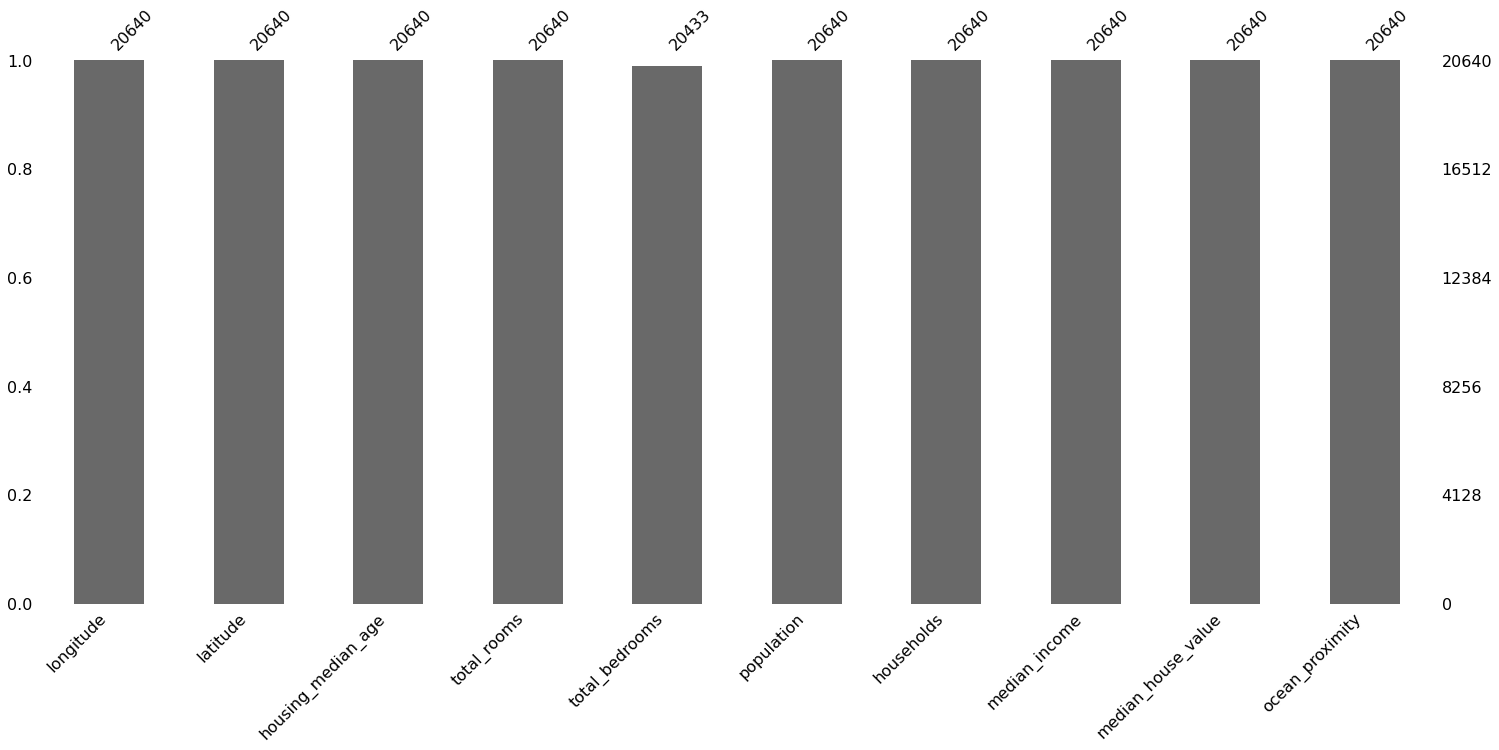

In [7]:
## check nulls using (missingno) library -- take care of the sum of above each bar
missingno.bar(df_housing);

* that Dataset is a contains 20640 instances and only 207 null values in **total_bedrooms** feature, and also all datatypes is float64 as they are continuous numerical features except the (ocean_proximity) column which is nominal categorical Feature` 

----------------

### EDA

### `Univariate Visualization`

categories of (ocean_proximity) --- 
 <1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64
********************************************************************************


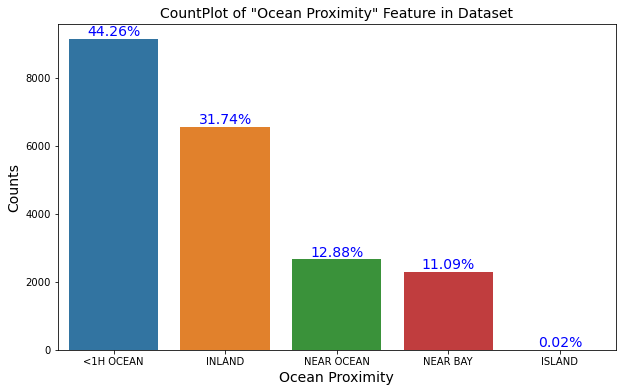

In [8]:
### Check the Distribution of (ocean_proximity) Feature in Dataset
ocean_values = df_housing['ocean_proximity'].value_counts()
print('categories of (ocean_proximity) --- \n', ocean_values)
print('**'*40)


## Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=df_housing, order=ocean_values.index)
plt.title('CountPlot of "Ocean Proximity" Feature in Dataset', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

## To show the percentage of each bar
for i in range(len(ocean_values)):  ## loop over the numbers of categories (number of bars)
    each_count = ocean_values.values[i]
    each_text = f'{((100*each_count)/ len(df_housing)):.2f}%'
    plt.text(x=i, y=each_count+100, s=each_text, c='b', fontsize=14, ha='center')

In [9]:
## Replace the  (<1H OCEAN) to (1H OCEAN) -- will cause ane errors in Deploymnet
df_housing['ocean_proximity'] = df_housing['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN')

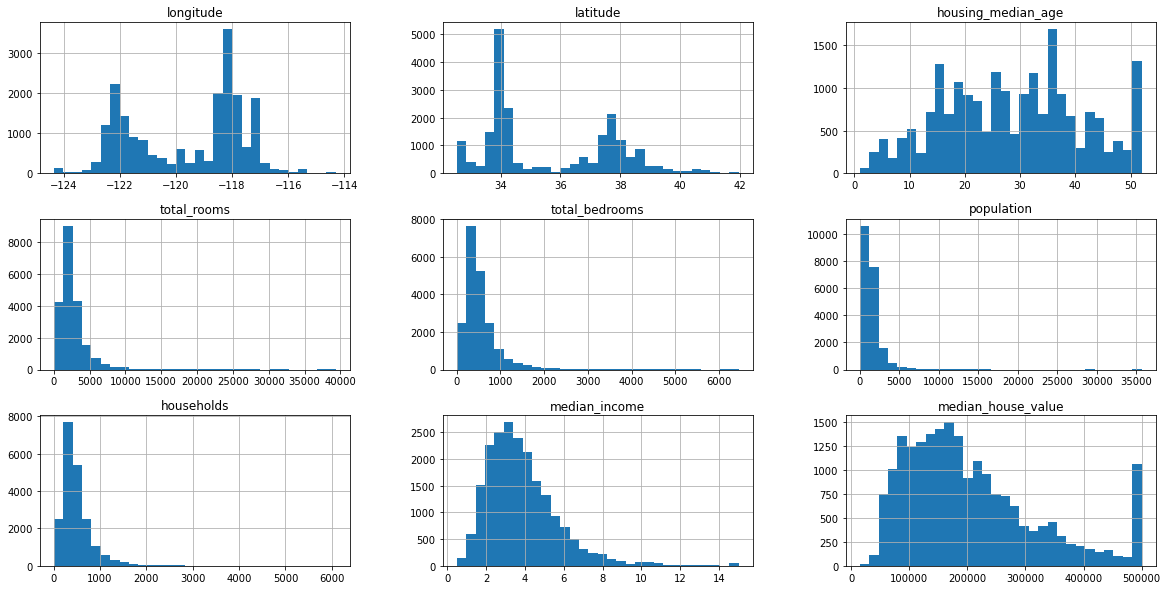

In [10]:
## Histogram Distr. of Numerical Features in Dataset
df_housing.hist(bins=30, figsize=(20, 10))
plt.show()

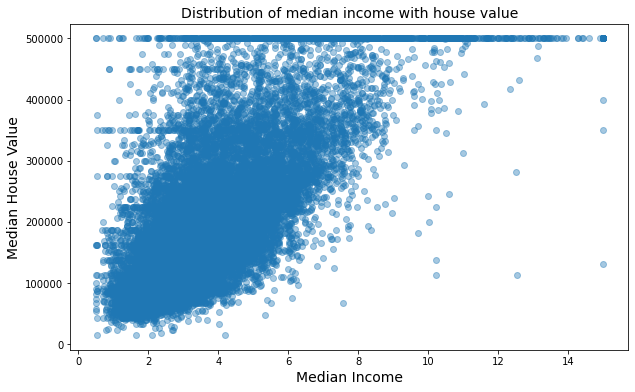

In [11]:
## Scatterplot with important Feature (medina_income) with the target (median_house_value)
plt.figure(figsize=(10, 6))
plt.scatter(df_housing['median_income'], df_housing['median_house_value'], alpha=0.4)
plt.title('Distribution of median income with house value', fontsize=14, c='k')
plt.xlabel('Median Income', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

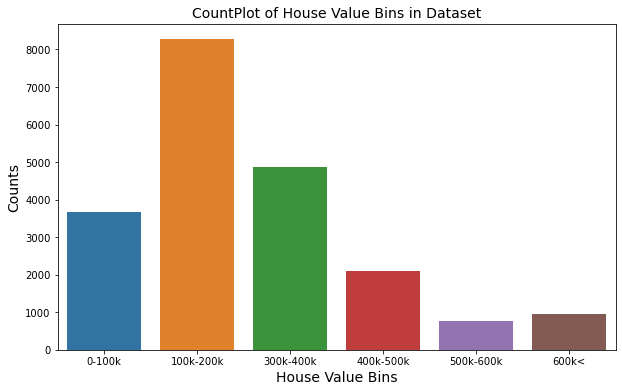

In [12]:
## Try for (median_house_value) to convert it into chunks (bins)
## Cut this Numerical Feature to Categorical One 
## Ex: for the following example -- any value between range (0-100k) will be the same category (like histogram)

house_value_bins = pd.cut(x=df_housing['median_house_value'], 
                          bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf],
                          labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])


## Countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

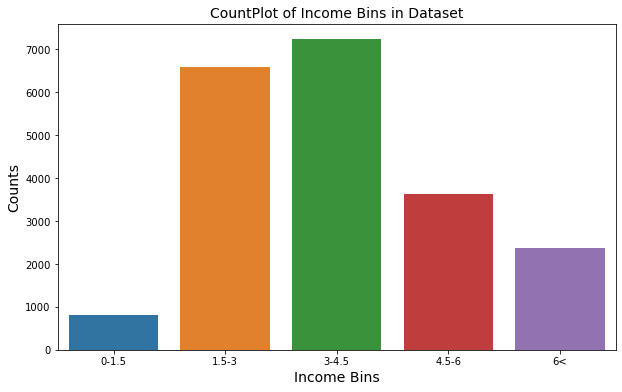

In [13]:
## Let's try the same above code for (median_income), I think it is very important Feature
income_bins = pd.cut(x=df_housing['median_income'], 
                     bins=[-np.inf, 1.5, 3, 4.5, 6, np.inf], 
                     labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])


## Countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=income_bins)
plt.title('CountPlot of Income Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Income Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show() 

* It seems that the (<1H ocean) is about the half of the dataset the data is biased to this category, someone can think to split the data according to this column using (startified) method if we found that this column is very important, we will discuss that later, Also, it seems that the Distribution of most of features are right skewed (exponential distribution) and it is known that the best distribution to be passed to the model is Normal Distribution, we will go further with these features to know how to deal with these skewed distrbution later, Also the majority of house_value is between (100k-200k), Also the majority of median_income is between (3-4.5), someone can change his mind and split the dataset using (startified) method according to the most important feature as I think till now which is (median_income) but use (income_bins) as the stratified method requires categorical features not numerical

### `Bivariate Visualization`

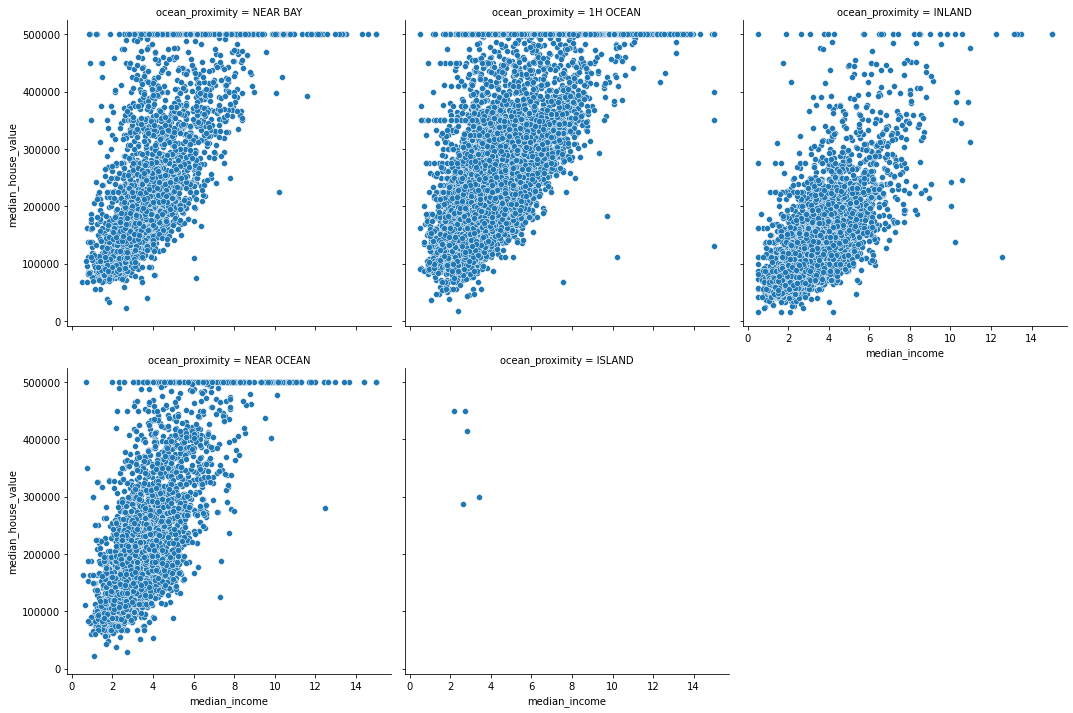

In [14]:
## Scatterplot with (median_income) & (median_house_value) at each (ocean_proximity)
sns.relplot(x='median_income', y='median_house_value', data=df_housing, kind='scatter', 
            col='ocean_proximity', col_wrap=3)
plt.show()

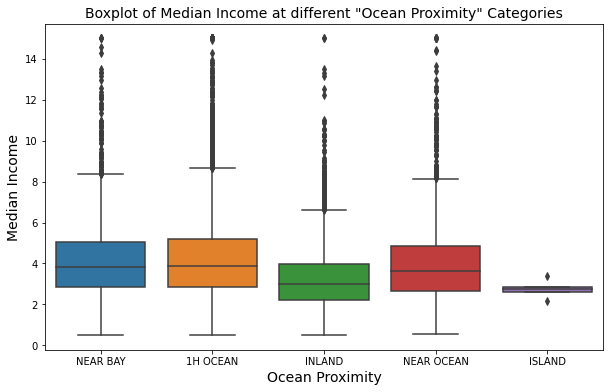

In [15]:
## Check the BoxPlot of the (median_income) at different Categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_income', data=df_housing, x='ocean_proximity')
plt.title('Boxplot of Median Income at different "Ocean Proximity" Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()

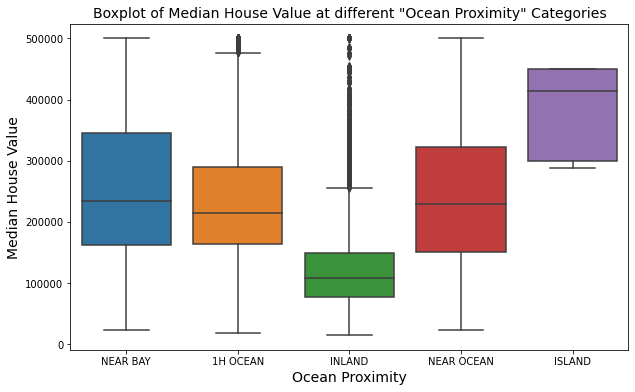

In [16]:
## Check the BoxPlot for (median_house_value) at different Categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_house_value', data=df_housing, x='ocean_proximity')
plt.title('Boxplot of Median House Value at different "Ocean Proximity" Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

* the Distribution of median_income is almost the same at ocean_proximity categories, Also, it seems that the INLAND median_income and median_house value is less than other categories and it makes sense ` 

### `Multivariate Visualization`

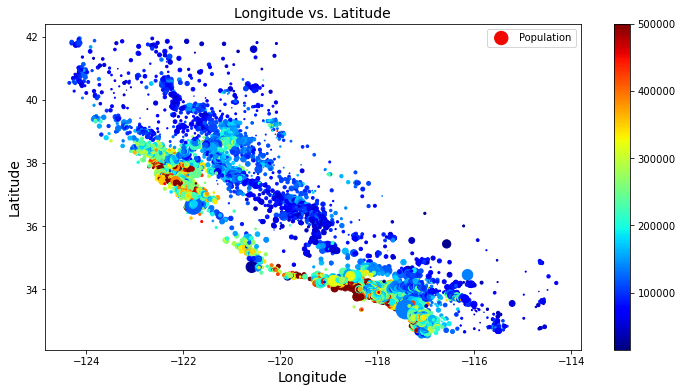

In [17]:
## ScatterPlot for (longitude & Latitude), and add (population) as size of point, and the color as (median_house_value)
plt.figure(figsize=(12, 6))
sc = plt.scatter(x=df_housing['longitude'], y=df_housing['latitude'], 
                 s=df_housing['population']/100, c=df_housing['median_house_value'], 
                 cmap=plt.get_cmap('jet'), label='Population')
plt.colorbar(sc)   ## colorbar
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

* The prices is higher near the ocean than other zones, and also these araes have higher population

---------

### `Check the Correlation between the Features and Target`

In [18]:
## Using pearson correlation
df_housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

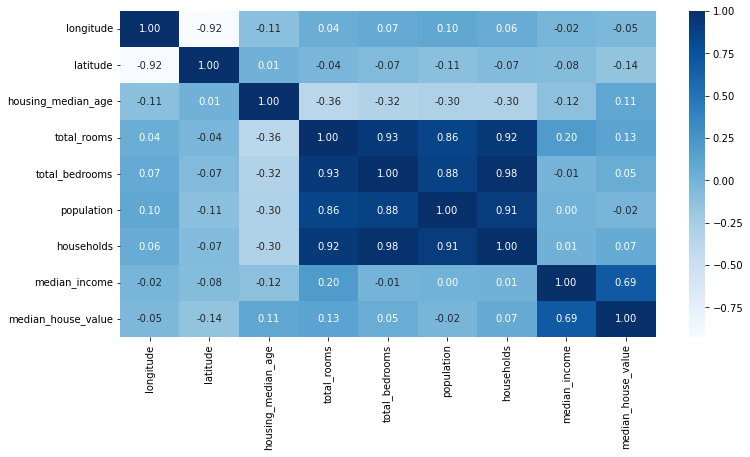

In [19]:
## you can show this as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_housing.corr(), annot=True, cmap='Blues', fmt='.2f')  ## symmetric matrix
plt.show()

* the most correlated Feature with target is (median_income) as I predict that, and feature like (households & population) are less correlated

### `Feature Engineering`
Try to add some features, thinking that it will be more useful and more correlated to the target

In [20]:
## Try to make some Feature Engineering --> Feature Extraction --> Add the new column to the main DF
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedroms_per_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']

In [21]:
## check the correlation again
df_housing.corr()['median_house_value'].sort_values(ascending=False)  ## some progress for out new features (very good)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

* Some progress for out new features (very good), Strong correlation

### `Split the Dataset`
``I will split the Dataset using ordinary method (random method) not (Stratified method)``

In [22]:
## Split the whole Dataset to Feature & Target
X = df_housing.drop(columns=['median_house_value'], axis=1)   ## Features
y = df_housing['median_house_value']   ## target

In [23]:
## Random split the dataset to two sets (train_set, test_set)
## For validation ---  I will use Cross Validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)


## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (17544, 12)
y_train shape --  (17544,)
X_test shape --  (3096, 12)
y_test shape --  (3096,)


### `Dealing with nulls`

In [24]:
## Separete the columns according to type (numerical or categorical)
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['float32', 'float64', 'int32', 'int64']]
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['float32', 'float64', 'int32', 'int64']]


print('Numerical Columns : \n', num_cols)
print('**'*40)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedroms_per_rooms', 'population_per_household']
********************************************************************************
Categorical Columns : 
 ['ocean_proximity']


In [25]:
## What about imputing the null using (median) ---> Using SimpleImputer
imputer = SimpleImputer(strategy='median')   ## Intialization
imputer.fit(X_train[num_cols])   ## learn

## Transform
X_train_filled = imputer.transform(X_train[num_cols])
X_test_filled = imputer.transform(X_test[num_cols])

### `Standardize the Features`

In [26]:
## using StandardScaler for each Feature to be (mean=0, std=1)
## This techniques helps for better training and to converge faster and put all features in the same scale
scaler = StandardScaler()  ## define an instance

## Learn and Transform in one step for train set , and transform only for test set
X_train_scaled = scaler.fit_transform(X_train_filled)  ## train
X_test_scaled = scaler.transform(X_test_filled)  ## test

### `Pipeline for Numerical Features`
`Building a pipeline is much easier and better while inference at new dataset`

In [27]:
## Building a pipeline for numerical variables
num_pipeline = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                              ]
                       )
## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_num = num_pipeline.fit_transform(X_train[num_cols])  ## train
X_test_num = num_pipeline.transform(X_test[num_cols])  ## test

### `Categorical Features`

In [28]:
## Let's use here for (ocean_proximity) --> use LabelEncoder (Try to use OHE)
lbl_encoder = LabelEncoder()    ## define an instance
X_train_encoded = lbl_encoder.fit_transform(np.squeeze(X_train[categ_cols].values))  ## learn and transform for train

X_test_encoded = lbl_encoder.transform(np.squeeze(X_test[categ_cols].values))  ## transform only for test

### `Pipeline for Categorical Features`

In [29]:
## Define pipeline for categorical columns --> use OneHotEncoder = OHE
categ_pipeline = Pipeline(steps=[
                                ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                ('OHE', OneHotEncoder(sparse=False))
                                ]
                         )

## deal with (categ_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_categ = categ_pipeline.fit_transform(X_train[categ_cols])
X_test_categ = categ_pipeline.transform(X_test[categ_cols])  ## much easier and much better

### `Get all Together`

In [30]:
## We can get much much easier like the following
## numerical pipeline
num_pipeline = Pipeline([
                        ('selector', DataFrameSelector(num_cols)),    ## select only these columns
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                        ])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse=False))])

## concatenate both two pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                            ('num_pipe', num_pipeline),
                                            ('categ_pipe', categ_pipeline)
                                               ]
                             )
## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)
X_test_final = total_pipeline.transform(X_test)                 ### Every thing is processed :D

### `Building ML Models`

Evaluation Metric: **RMSE**

### `1. LinearRegression`

In [31]:
## LinearRegression -- Regression using Ordinary Least Squares (OLS) Method

## define the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)  ## train

LinearRegression()

In [32]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_lin = cross_val_score(estimator=lin_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_lin = -1 * rmse_scores_lin   ## we want it positive
rmse_scores_lin = np.sqrt(rmse_scores_lin)
print(f'RMSE Scores Using LinearRegression --- {np.round(rmse_scores_lin, 4)}')
print(f'Mean of RMSE Scores Using LinearRegression --- {rmse_scores_lin.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_lin = cross_val_predict(estimator=lin_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_lin = np.sqrt(mean_squared_error(y_train, y_pred_lin))
print(f'RMSE after prediction Using LinearRegression --- {rmse_pred_lin:.4f}')  ## almost the same result :D

RMSE Scores Using LinearRegression --- [66469.8275 69222.723  66338.7127 67047.6716 70321.7781]
Mean of RMSE Scores Using LinearRegression --- 67880.1426
************************************************************************************************************************
RMSE after prediction Using LinearRegression --- 67898.8887


### `2. Ridge`
`Regression using Ordinary Least Squares, but regularized version of LinearRegression using (L2-Norm)`

In [33]:
## Define Ridge Model (Regularized Version of LinearRegression)
ridge_reg = Ridge(alpha=0.9, solver='cholesky')
ridge_reg.fit(X_train_final, y_train)  ## train the model

Ridge(alpha=0.9, solver='cholesky')

In [34]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_ridge = cross_val_score(estimator=ridge_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_ridge = -1 * rmse_scores_ridge   ## we want it positive
rmse_scores_ridge = np.sqrt(rmse_scores_ridge)
print(f'RMSE Scores Using Ridge --- {np.round(rmse_scores_ridge, 4)}')
print(f'Mean of RMSE Scores Using Ridge --- {rmse_scores_ridge.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_ridge = cross_val_predict(estimator=ridge_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))
print(f'RMSE after prediction Using Ridge --- {rmse_pred_ridge:.4f}')  ## almost the same result :D

RMSE Scores Using Ridge --- [66472.689  69222.7453 66350.7247 67031.9174 70323.0198]
Mean of RMSE Scores Using Ridge --- 67880.2192
************************************************************************************************************************
RMSE after prediction Using Ridge --- 67898.9471


### `3. Lasso`

`Regression using Ordinary Least Squares, but regularized version of LinearRegression using (L1-Norm)`

In [35]:
## Define Lasso Model (Regularized Version of LinearRegression)
lasso_reg = Lasso(alpha=1, max_iter=100000)
lasso_reg.fit(X_train_final, y_train)  ## train the model   and try predictions in the same way

Lasso(alpha=1, max_iter=100000)

In [36]:
## check the weights using Lasso, and Ridge --- Lasso is a Features Selection Model ? why?
lasso_reg.coef_

array([-56166.28650229, -56466.30701119,  13864.90232431,   6112.77503543,
         8937.16731622, -46626.84295639,  36609.7003318 ,  79167.88726091,
         6350.89510096,  16578.08308073,    700.82893968,      0.        ,
       -34479.90501045, 143036.55857523,  -5501.79735044,   3698.19799083])

### `4. KNN`

In [37]:
## Using KNN, Low n_neighbors -> Overfitting &  High n_neighbors ->  Underfitting
knn_reg = KNeighborsRegressor(n_neighbors=8, p=2,  metric='minkowski', weights='uniform')
knn_reg.fit(X_train_final, y_train)  ## train the model

KNeighborsRegressor(n_neighbors=8)

In [38]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_knn = cross_val_score(estimator=knn_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_knn = -1 * rmse_scores_knn   ## we want it positive
rmse_scores_knn = np.sqrt(rmse_scores_knn)
print(f'RMSE Scores Using KNN --- {np.round(rmse_scores_knn, 4)}')
print(f'Mean of RMSE Scores Using KNN --- {rmse_scores_knn.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_knn = cross_val_predict(estimator=knn_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_knn = np.sqrt(mean_squared_error(y_train, y_pred_knn))
print(f'RMSE after prediction Using KNN --- {rmse_pred_knn:.4f}')  ## almost the same result :D

RMSE Scores Using KNN --- [60978.9699 61687.7848 60277.5273 59442.3636 62191.8308]
Mean of RMSE Scores Using KNN --- 60915.6953
************************************************************************************************************************
RMSE after prediction Using KNN --- 60923.5123


### `5. RandomForest`

In [39]:
## Using RF ---> A lot of Hyperparams but the Dominant (n_estimators, max_depth)
forest_reg = RandomForestRegressor(n_estimators=150, max_depth=6, max_samples=0.8, random_state=42, n_jobs=-1)
forest_reg.fit(X_train_final, y_train)  ## train

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150, n_jobs=-1,
                      random_state=42)

In [40]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_forest = cross_val_score(estimator=forest_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_forest = -1 * rmse_scores_forest   ## we want it positive
rmse_scores_forest = np.sqrt(rmse_scores_forest)
print(f'RMSE Scores Using RandomForest --- {np.round(rmse_scores_forest, 4)}')
print(f'Mean of RMSE Scores Using RandomForest --- {rmse_scores_forest.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_forest = cross_val_predict(estimator=forest_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_forest = np.sqrt(mean_squared_error(y_train, y_pred_forest))
print(f'RMSE after prediction Using RandomForest --- {rmse_pred_forest:.4f}')  ## almost the same result :D

RMSE Scores Using RandomForest --- [58925.9674 61130.1728 60472.2879 58330.2278 60989.7339]
Mean of RMSE Scores Using RandomForest --- 59969.6780
************************************************************************************************************************
RMSE after prediction Using RandomForest --- 59980.3194


`Since RMSE from Random Forest indicate better fit from the rest of the training model, we should do tuning RF model`

### `RF Tuning`

In [41]:
# import sys

## Using RandomizedSearchCV
params_best_forest = {'n_estimators': np.arange(100, 500, 50), 
                      'max_depth': np.arange(4, 20, 2), 
                      'max_samples': [0.7, 0.8, 0.9, 1]}

## Intialize
search_random_forest = RandomizedSearchCV(estimator=forest_reg, param_distributions=params_best_forest, 
                                          n_iter=20, scoring='neg_mean_squared_error', 
                                          cv=5, verbose=6, random_state=422)

search_random_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2391187635.752 total time=   9.4s
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2781205995.392 total time=   8.1s
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2645155556.888 total time=   7.9s
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2418477575.713 total time=   8.1s
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2556063413.546 total time=   8.6s
[CV 1/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2492709737.035 total time=  16.2s
[CV 2/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2884779798.841 total time=  15.1s
[CV 3/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2755109200.857 total time=  13.0s
[CV 4/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2509031588.719 total time=  12.3s
[C

[CV 5/5] END max_depth=4, max_samples=1, n_estimators=150;, score=-13489042553.576 total time=   0.4s
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2384896179.131 total time=  18.7s
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2759362249.987 total time=  17.9s
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2648709690.778 total time=  18.7s
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2414566168.514 total time=  18.7s
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2539287365.132 total time=  18.0s
[CV 1/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-2969350121.079 total time=   9.4s
[CV 2/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-3285813274.305 total time=   9.7s
[CV 3/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-3182203195.062 total time=   9.6s
[CV 4/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150, n_jobs=-1,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=422, scoring='neg_mean_squared_error',
                   verbose=6)

In [42]:
## Get the best Params
best_foresr_params = search_random_forest.best_params_
print('best_foresr_params -- ', best_foresr_params)

## Get the best estimator
best_forest = search_random_forest.best_estimator_  ## predict using this Model
print('best_forest -- ', best_forest)

best_foresr_params --  {'n_estimators': 400, 'max_samples': 0.9, 'max_depth': 18}
best_forest --  RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      n_jobs=-1, random_state=42)


In [43]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_tuned_forest = cross_val_score(estimator=best_forest, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_forest = -1 * rmse_scores_tuned_forest   ## we want it positive
rmse_scores_tuned_forest = np.sqrt(rmse_scores_tuned_forest)
print(f'RMSE Scores Using Tuned RandomForest --- {np.round(rmse_scores_tuned_forest, 4)}')
print(f'Mean of RMSE Scores Using Tuned RandomForest --- {rmse_scores_tuned_forest.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_tuned_forest = cross_val_predict(estimator=best_forest, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_tuned_forest = np.sqrt(mean_squared_error(y_train, y_pred_tuned_forest))
print(f'RMSE after prediction Using Tuned RandomForest --- {rmse_pred_tuned_forest:.4f}')  ## almost the same result :D

RMSE Scores Using Tuned RandomForest --- [48550.1057 52281.4938 51246.7275 48834.964  50251.959 ]
Mean of RMSE Scores Using Tuned RandomForest --- 50233.0500
************************************************************************************************************************
RMSE after prediction Using Tuned RandomForest --- 50252.9752


### `Feature Importance using RF`

In [44]:
## Getting the Features Importance (they are normalized in RF, sum=1)
feat_import_forest = {}   ## to append in it
for name, score in zip(num_cols, best_forest.feature_importances_[:11]):  ## take only the first 11 Numerical Cols
    feat_import_forest[name] = score
    
## Features are keys, Importance is the value
keys_forest = feat_import_forest.keys()
values_forest = feat_import_forest.values()

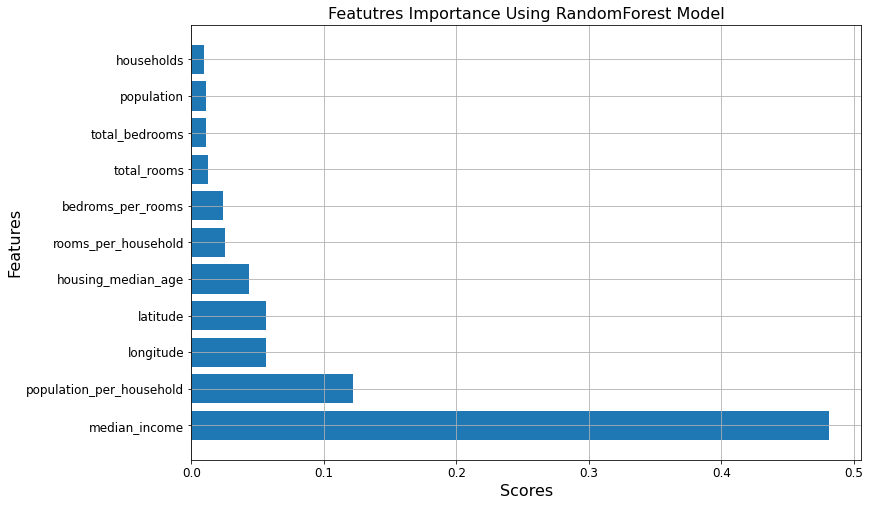

In [45]:
## to DF and then plotting
df_feat_import_forest = pd.DataFrame({'Features': keys_forest, 'Scores': values_forest})
df_feat_import_forest = df_feat_import_forest.sort_values(by='Scores', ascending=False)

## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_forest['Features'], width=df_feat_import_forest['Scores'])
plt.title('Featutres Importance Using RandomForest Model', fontsize=16, c='k')
plt.xlabel('Scores', fontsize=16, c='k')
plt.ylabel('Features', fontsize=16, c='k')
plt.xticks(c='k', fontsize=12)
plt.yticks(c='k', fontsize=12)
plt.grid('on')
plt.show()

### `XGboost -- try above and beyond`

In [46]:
## Using the Hero API -- XGBOOST
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_reg.fit(X_train_final, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [47]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_xgb = cross_val_score(estimator=xgb_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_xgb = -1 * rmse_scores_xgb   ## we want it positive
rmse_scores_xgb = np.sqrt(rmse_scores_xgb)
print(f'RMSE Scores Using Tuned XGBoost --- {np.round(rmse_scores_xgb, 4)}')
print(f'Mean of RMSE Scores Using XGBoost --- {rmse_scores_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_xgb = cross_val_predict(estimator=xgb_reg, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
print(f'RMSE after prediction Using XGBoost --- {rmse_pred_xgb:.4f}')  ## almost the same result :D

RMSE Scores Using Tuned XGBoost --- [46401.218  48678.5008 48205.3615 46268.9467 48333.7256]
Mean of RMSE Scores Using XGBoost --- 47577.5505
************************************************************************************************************************
RMSE after prediction Using XGBoost --- 47588.5920


### `Tuning XGBoost`

In [48]:
### Let's try tuning XGBoost using GridSearchCV  --- needs alot of tuning
params_best_xgb = {'n_estimators': np.arange(100, 200, 50), 'max_depth': np.arange(4, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.8, 0.9]}


## Intitalize the GridSearchCV and Fit ti Data
grid_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params_best_xgb, cv=5, 
                        scoring='neg_mean_squared_error', n_jobs=-1, verbose=6)
grid_xgb.fit(X_train_final, y_train)  ## train

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,


In [49]:
## Get the best Params
best_xgb_params = grid_xgb.best_params_
print('best_xgb_params -- ', best_xgb_params)

## Get the best estimator
best_xgb = grid_xgb.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_xgb)

best_xgb_params --  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8}
best_xgb --  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [50]:
### Finally

## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_tuned_xgb = cross_val_score(estimator=best_xgb, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb   ## we want it positive
rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_tuned_xgb = cross_val_predict(estimator=best_xgb, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_tuned_xgb = np.sqrt(mean_squared_error(y_train, y_pred_tuned_xgb))
print(f'RMSE after prediction Using Tuned XGBoost --- {rmse_pred_tuned_xgb:.4f}')  ## almost the same result :D

RMSE Scores Using Tuned Tuned XGBoost --- [44577.0097 46753.8341 46620.9049 45085.3031 46345.7689]
Mean of RMSE Scores Using Tuned XGBoost --- 45876.5642
************************************************************************************************************************
RMSE after prediction Using Tuned XGBoost --- 45884.9481


### `Feature Importance using XGBoost`

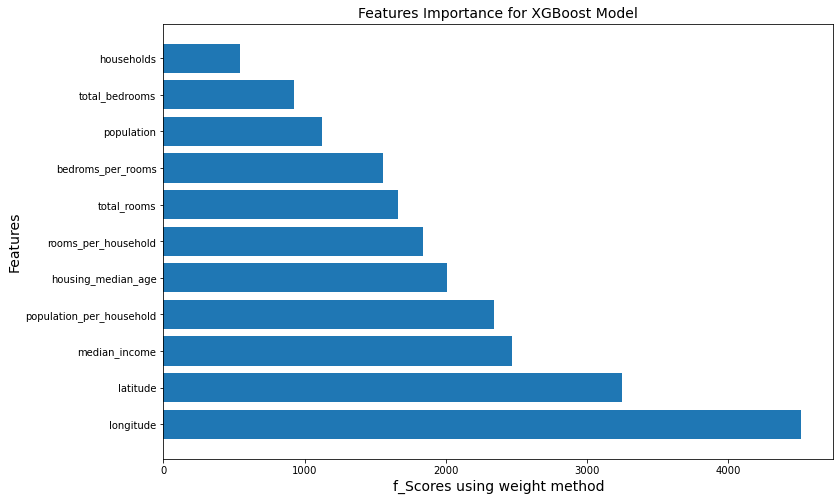

In [51]:
## Using XGBoost to get the Feature Importance
## get and sort 
feat_import_xgb = best_xgb.get_booster().get_score(importance_type='weight')  ## the same as RF, but RF normalize
df_feat_import_xgb = pd.DataFrame.from_dict(feat_import_xgb, orient='index')   ## to DF
df_feat_import_xgb = df_feat_import_xgb.reset_index()
df_feat_import_xgb = df_feat_import_xgb.rename(columns={'index': 'Features', 0:'f_scores'})  ## Some Modification

## Only taking the first 11 Numerical Cols 
df_feat_import_xgb = df_feat_import_xgb[:11]   ## take only the first 11 Numerical Cols

# ## Some Sort to plot
df_feat_import_xgb['Features'] = num_cols
df_feat_import_xgb = df_feat_import_xgb.sort_values(by='f_scores', ascending=False)


## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_xgb['Features'], width=df_feat_import_xgb['f_scores'])
plt.title('Features Importance for XGBoost Model', fontsize=14, c='k')
plt.xlabel('f_Scores using weight method', fontsize=14, c='k')
plt.xticks(c='k')
plt.yticks(c='k')
plt.ylabel('Features', fontsize=14, c='k')
plt.show()

### `Models Comparison`

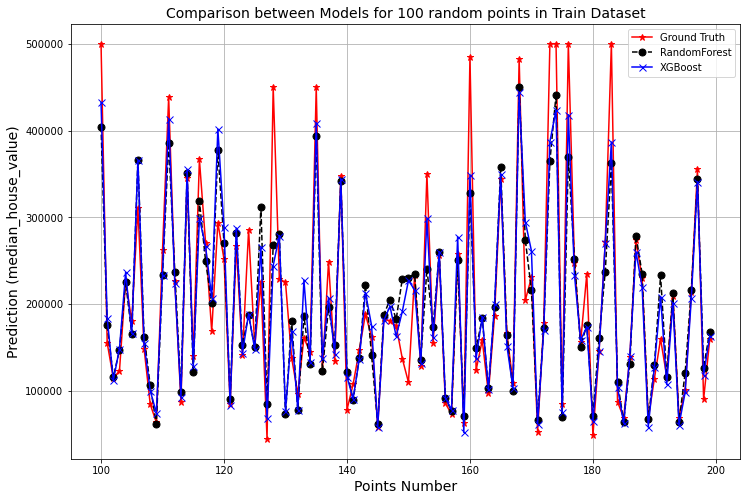

In [54]:
## Plotting
x_x = np.arange(100, 200)  ## random selected points
## Plotting
plt.figure(figsize=(12, 8))
plt.plot(x_x, y_train.values[100:200], 'r*-',  markersize=7, label='Ground Truth')  ## for train
plt.plot(x_x, y_pred_tuned_forest[100:200], 'ko--', markersize=7, label='RandomForest')
plt.plot(x_x, y_pred_tuned_xgb[100:200], 'bx-', markersize=7, label='XGBoost')
plt.title('Comparison between Models for 100 random points in Train Dataset', fontsize=14, color='k')
plt.xlabel('Points Number', fontsize=14, color='k')
plt.ylabel('Prediction (median_house_value)', fontsize=14, color='k')
plt.legend()
plt.grid('on')
plt.show()

### `Download the best Model --- best_xgb`

In [55]:
## Download using joblib
joblib.dump(best_xgb, 'model_XGBoost.pkl')

['model_XGBoost.pkl']

In [56]:
## to load this pretrained Model
loaded_model = joblib.load('model_XGBoost.pkl')
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### `Inference on Test Dataset`

In [57]:
## Now, we can touch Test Dataset using (loaded_model == best_xgb) -- tuned XGBoost Model
y_pred_test = loaded_model.predict(X_test_final)  ## Remember X_test_final --> is processed and ready (take care)

## RMSE on test after finishing all my work
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'RMSE on test Dataset using XGBoost -- {rmse_test:.3f}')   ## Very Good :D

RMSE on test Dataset using XGBoost -- 44640.304
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=-2593926229.022 total time=   4.4s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=-2520280703.095 total time=   4.6s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.8;, score=-2435177492.184 total time=   6.4s
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.9;, score=-2325256292.519 total time=   6.2s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.9;, score=-2589264004.424 total time=   5.3s
[CV 4/5] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8;, score=-2140815429.862 total time=   5.2s
[CV 3/5] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.9;, score=-2372565424.117 total time=   6.7s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=150, subsample=0.8;, score=-2285869086.316 total time=

[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=-2590239392.349 total time=   4.4s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=-2562905992.036 total time=   4.5s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=-2712761086.288 total time=   4.3s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.8;, score=-2466827041.713 total time=   6.4s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=150, subsample=0.9;, score=-2416475990.355 total time=   5.1s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8;, score=-2369596436.516 total time=   5.4s
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.9;, score=-2165033433.474 total time=   5.5s
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.9;, score=-2333386788.991 total time=   6.9s
[CV 4/5] END learning_rate=0.1, max_dept